In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
import matplotlib as mpl
def display_img(I, label=None):
    dpi = mpl.rcParams['figure.dpi']
    print('Shape:', I.shape)
    print('dpi:', dpi)
    fig = plt.figure(figsize=( I.shape[0]/float(dpi) , I.shape[1]/float(dpi)))
    ax = fig.add_axes([0,0,1,1])
    ax.axis('off')
    if label==None:
        ax.imshow(I, cmap='gray')
    else:
        ax.imshow(I)
    plt.show

(667, 1000, 3)


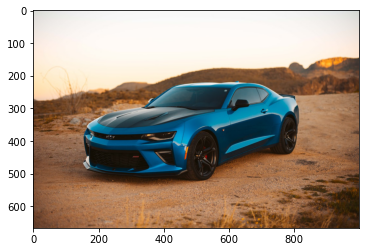

In [3]:
img = plt.imread('car.jpeg')
print(img.shape)
plt.imshow(img, cmap='gray')

# OpenCV

In [4]:
img = cv2.imread('car.jpeg', cv2.IMREAD_GRAYSCALE)
img.shape

(667, 1000)

In [5]:
img[200:800, 500:1000] = 255
img[50:100, 50:200] = 0

In [6]:
#  Show img using OpenCV
# cv2.imshow('Gray', img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

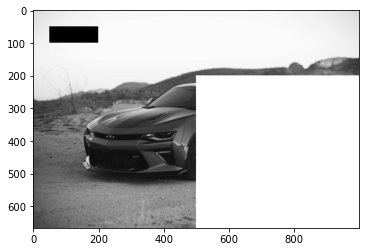

In [7]:
plt.imshow(img, cmap='gray')

In [8]:
cv2.imwrite('New.jpg', img)

True

# RGB

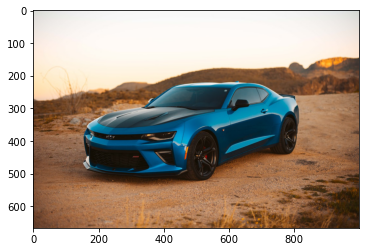

In [9]:
cimg = plt.imread('car.jpeg')
plt.imshow(cimg)

In [10]:
R = cimg[:,:, 0]
G = cimg[:,:, 1]
B = cimg[:,:, 2]

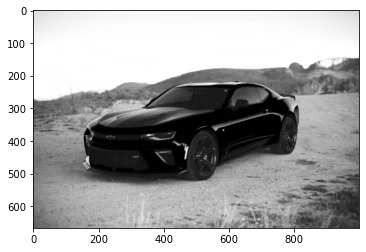

In [11]:
plt.imshow(R, cmap='gray')

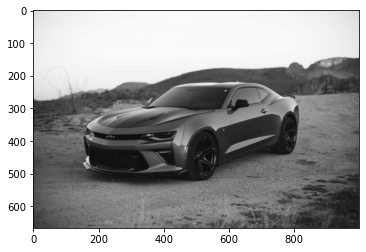

In [12]:
plt.imshow(G, cmap='gray')

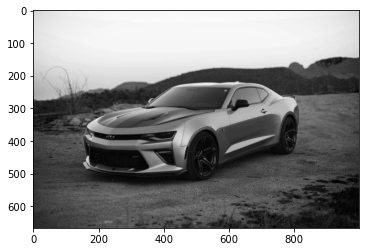

In [13]:
plt.imshow(B, cmap='gray')

# OpenCV BGR 

In [14]:
dog = cv2.imread('car.jpeg')
dog = dog[:,:,::-1] # Changes BGR to RGB

In [15]:
R = dog[:,:, 0]
G = dog[:,:, 1]
B = dog[:,:, 2]

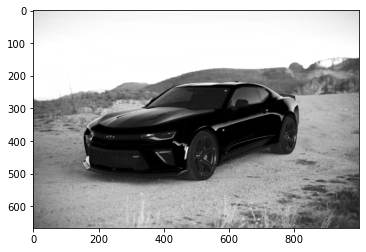

In [16]:
plt.imshow(R, cmap='gray')

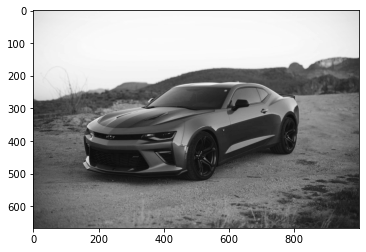

In [17]:
plt.imshow(G, cmap='gray')

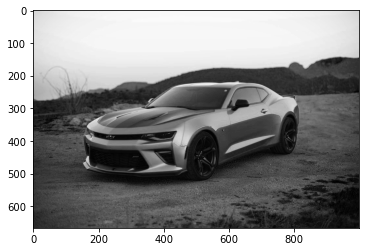

In [18]:
plt.imshow(B, cmap='gray')

# RGB and BGR Img Creating

(90, 90, 3)


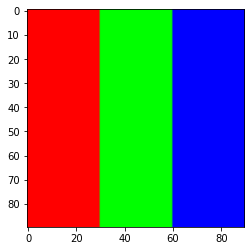

In [19]:
img = np.zeros((90,90,3), dtype='uint8')
img[:,:30,0] = 255
img[:,30:60,1] = 255
img[:,60:,2] = 255

print(img.shape)
plt.imshow(img)

(90, 90, 3)


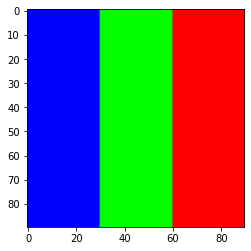

In [20]:
img = np.zeros((90,90,3), dtype='uint8')
img[:, :30 , 2] = 255
img[:, 30:60 , 1] = 255
img[:, 60: , 0] = 255

print(img.shape)
plt.imshow(img)

# Converting Colour Scheme to HSV

Text(0.5, 1.0, 'HSV')

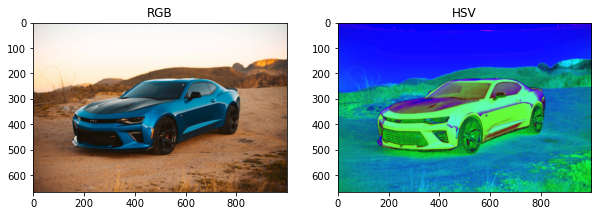

In [21]:
img = cv2.imread('car.jpeg')
img = img[:,:,::-1]

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(img)
plt.title('RGB')

plt.subplot(122)
img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
plt.imshow(img)
plt.title('HSV')

# Object Segmentation

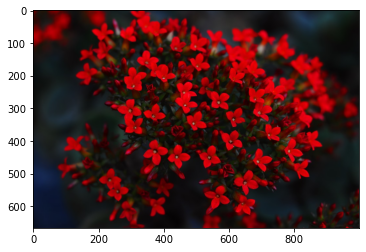

In [22]:
flower = cv2.imread('red.jpeg')[:,:,::-1]
plt.imshow(flower)

In [23]:
flower_hsv = cv2.cvtColor(flower, cv2.COLOR_RGB2HSV)

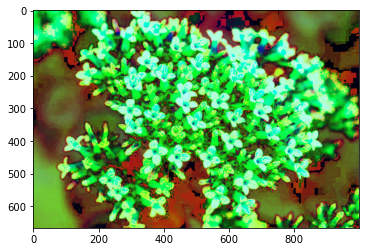

In [24]:
plt.imshow(flower_hsv)

### Two Masks to Cover whole Red Range - > GOOGLE

In [25]:
lr = np.array([0, 100, 100])
hr = np.array([30, 255, 255])
mask1 = cv2.inRange(flower_hsv, lr, hr)

In [26]:
lr = np.array([150, 100, 100])
hr = np.array([180, 255, 255])
mask2 = cv2.inRange(flower_hsv, lr, hr)

In [27]:
full_mask  = mask1 | mask2

In [28]:
mask_ou = cv2.bitwise_and(flower, flower, mask=full_mask)

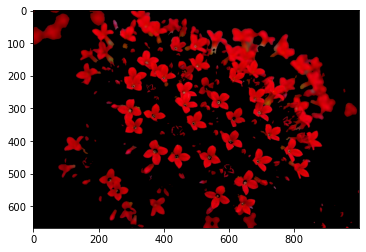

In [29]:
plt.imshow(mask_ou)

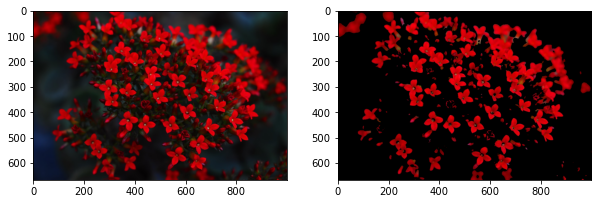

In [30]:
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(flower)

plt.subplot(122)
img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
plt.imshow(mask_ou)

# Scaling

In [31]:
image = 'car.jpeg'

In [32]:
color_car = cv2.imread(image)[:,:,::-1]
gray_car = cv2.imread(image, cv2.IMREAD_GRAYSCALE)

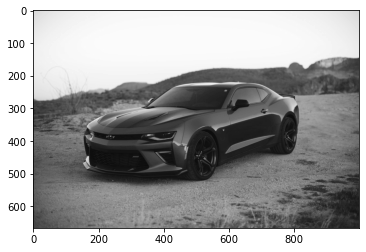

In [33]:
plt.imshow(gray_car, cmap='gray')

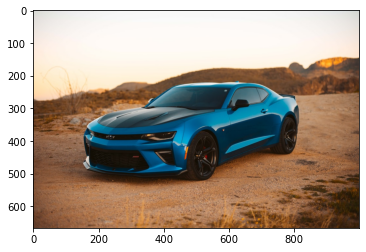

In [34]:
plt.imshow(color_car)

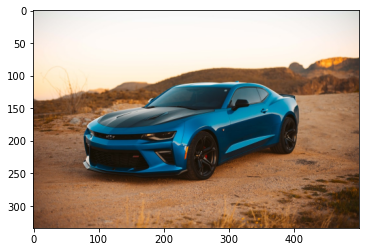

In [35]:
Img_resize = cv2.resize(src=color_car, fx=0.5, fy=0.5, dsize=None)
plt.imshow(Img_resize)

In [36]:
print(color_car.shape, Img_resize.shape)

(667, 1000, 3) (334, 500, 3)


In [37]:
def Custom_Scaling(img, fx, fy):
    new_x = int(img.shape[0]*fx)
    new_y = int(img.shape[1]*fy)
    S = np.array([
            [fx, 0],
            [0, fy]
        ])
    scaled_img = np.zeros((new_x, new_y))
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            new_i, new_j = S.dot([i, j])
            scaled_img[int(new_i)][int(new_j)] = img[i][j]
    return scaled_img

In [38]:
gray_car = cv2.imread(image, cv2.IMREAD_GRAYSCALE)
gray_car.shape

(667, 1000)

Shape: (1354, 2400)
dpi: 72.0


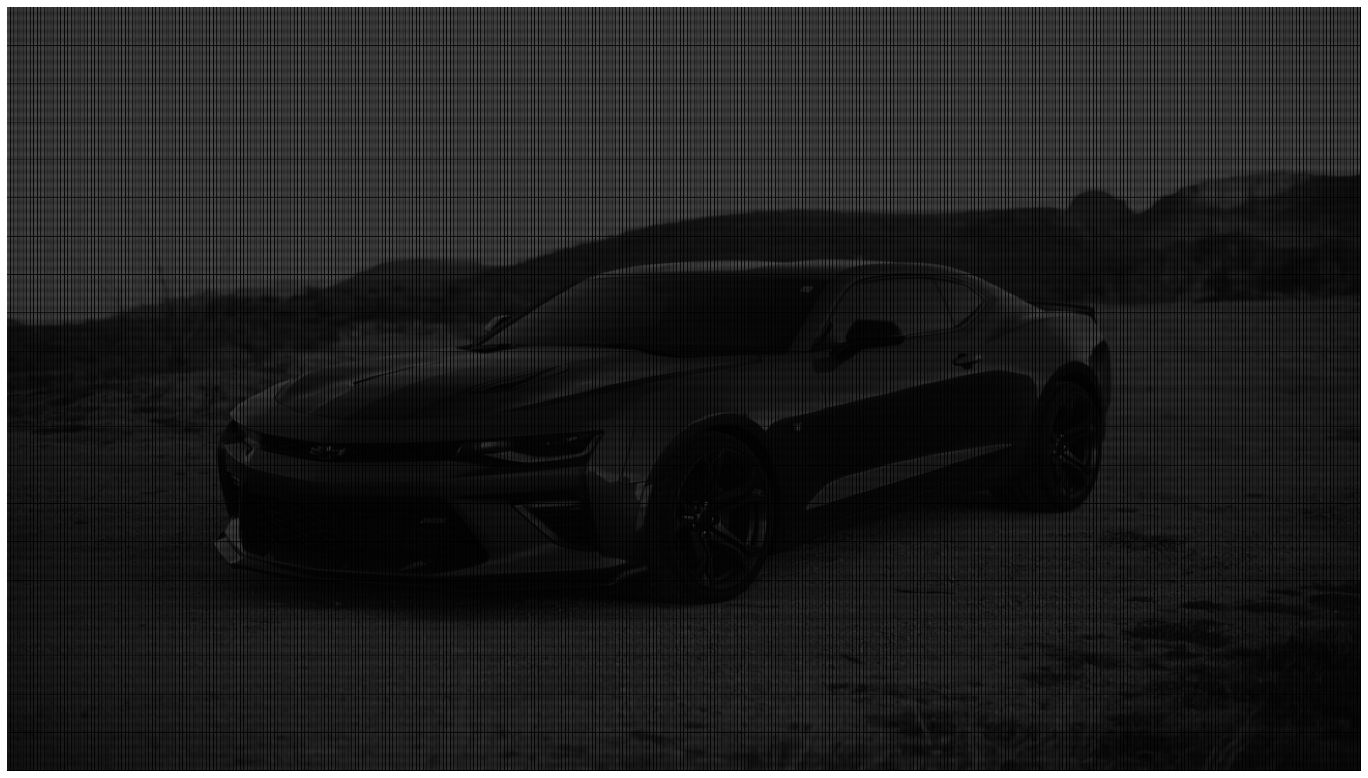

In [39]:
custom_scales = Custom_Scaling(gray_car, 2.03, 2.4)
display_img(custom_scales)

# Cropping Image

In [40]:
def Crop_Img(img, fx, fy):
    cropped_img = np.zeros((fx, fy))
    for i in range(fx):
        for j in range(fy):
            cropped_img[i, j] = img[i,j]
    return cropped_img

In [41]:
gray_car = cv2.imread(image, cv2.IMREAD_GRAYSCALE)
gray_car.shape

(667, 1000)

In [42]:
cropped_img = Crop_Img(gray_car, int(gray_car.shape[0]/2), int(gray_car.shape[1]/2) )
cropped_img.shape

(333, 500)

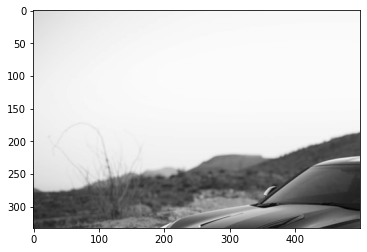

In [43]:
plt.imshow(cropped_img, cmap='gray')

# Mirror the Image

In [44]:
def Mirror_img(img):
    new_image = np.zeros((img.shape[0], img.shape[1]))
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            new_image[i,img.shape[1]-j-1] = img[i,j]
    return new_image

In [45]:
gray_car = cv2.imread(image, cv2.IMREAD_GRAYSCALE)
gray_car.shape

(667, 1000)

In [46]:
newer_img = Mirror_img(gray_car)
newer_img.shape

(667, 1000)

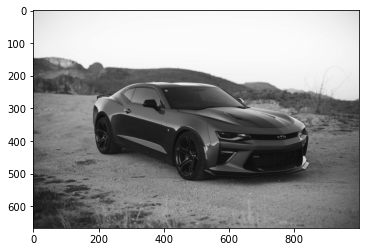

In [47]:
plt.imshow(newer_img, cmap='gray')

# Inverse Scaling Using Nearest Neigbor Interpolation

In [48]:
def Nearest_Neigbor_Interpolation(img, fx, fy):
    new_x = int(img.shape[0]*fx)
    new_y = int(img.shape[1]*fy)
    S = np.array([
            [fx, 0],
            [0, fy]
        ])
    S = np.linalg.inv(S)

    scaled_img = np.zeros((new_x, new_y))
    for i in range(scaled_img.shape[0]):
        for j in range(scaled_img.shape[1]):
            new_i, new_j = S.dot([i, j])
            
            new_i, new_j = int(np.floor(new_i)), int(np.floor(new_j))
            if new_i<0 or new_i>=scaled_img.shape[0] or new_j<0 or new_j>=scaled_img.shape[1]:
                pass
            else:
                scaled_img[i][j] = img[new_i][new_j]
    return scaled_img

Shape: (1000, 2080)
dpi: 72.0


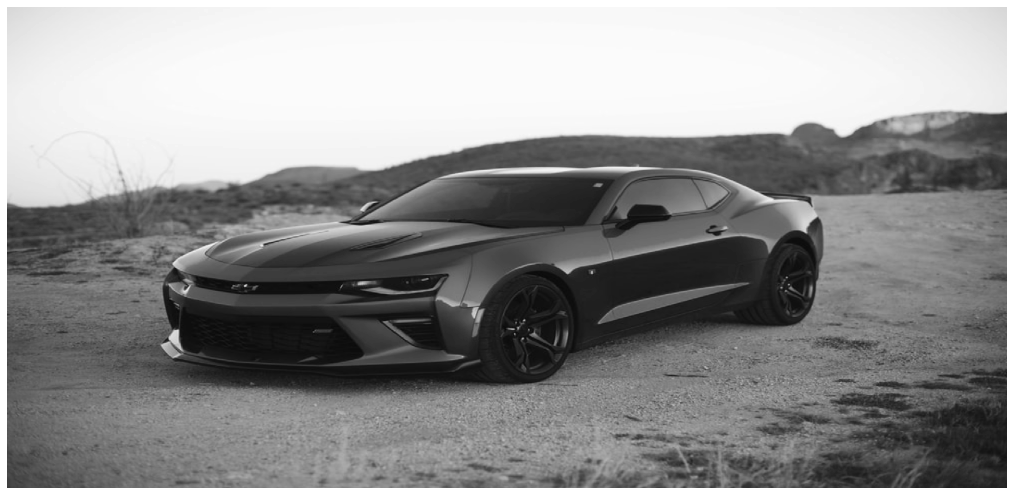

In [49]:
gray_car = cv2.imread('car.jpeg', cv2.IMREAD_GRAYSCALE)
custom_scales = Nearest_Neigbor_Interpolation(gray_car, 1.5, 2.08)
display_img(custom_scales)

# Bilinear Intrepolation

In [50]:
def Dist_Bilinear_Interpolation(img, row, col):
    left_col = int(col)
    right_col = left_col+1
    wr = col-left_col
    wl = right_col-col
        
    top_row = int(row)
    bottom_row = top_row+1
    wt = bottom_row-row
    wb = row-top_row
    if top_row>=0 and bottom_row<img.shape[0] and left_col>=0 and right_col<img.shape[1]:   
        a = wl*img[top_row, right_col]+wr*img[top_row, left_col]
        b = wl*img[bottom_row, right_col]+wr*img[bottom_row, left_col]     
        c = wt*a+wb*b
        return int(c)
    else:
        return 0

In [51]:
def Bilinear_Interpolation(img, fx, fy):
    new_x = int(img.shape[0]*fx)
    new_y = int(img.shape[1]*fy)
    S = np.array([
            [fx, 0],
            [0, fy]
        ])
    S = np.linalg.inv(S)

    scaled_img = np.zeros((new_x, new_y))
    for i in range(scaled_img.shape[0]):
        for j in range(scaled_img.shape[1]):
            new_i, new_j = S.dot([i, j]) 
            if new_i<0 or new_i>=scaled_img.shape[0] or new_j<0 or new_j>=scaled_img.shape[1]:
                pass
            else:
                value = np.array(Dist_Bilinear_Interpolation(img, new_i, new_j), dtype=np.uint8)
                scaled_img[i][j] = value         
    return scaled_img

Shape: (1354, 2040)
dpi: 72.0


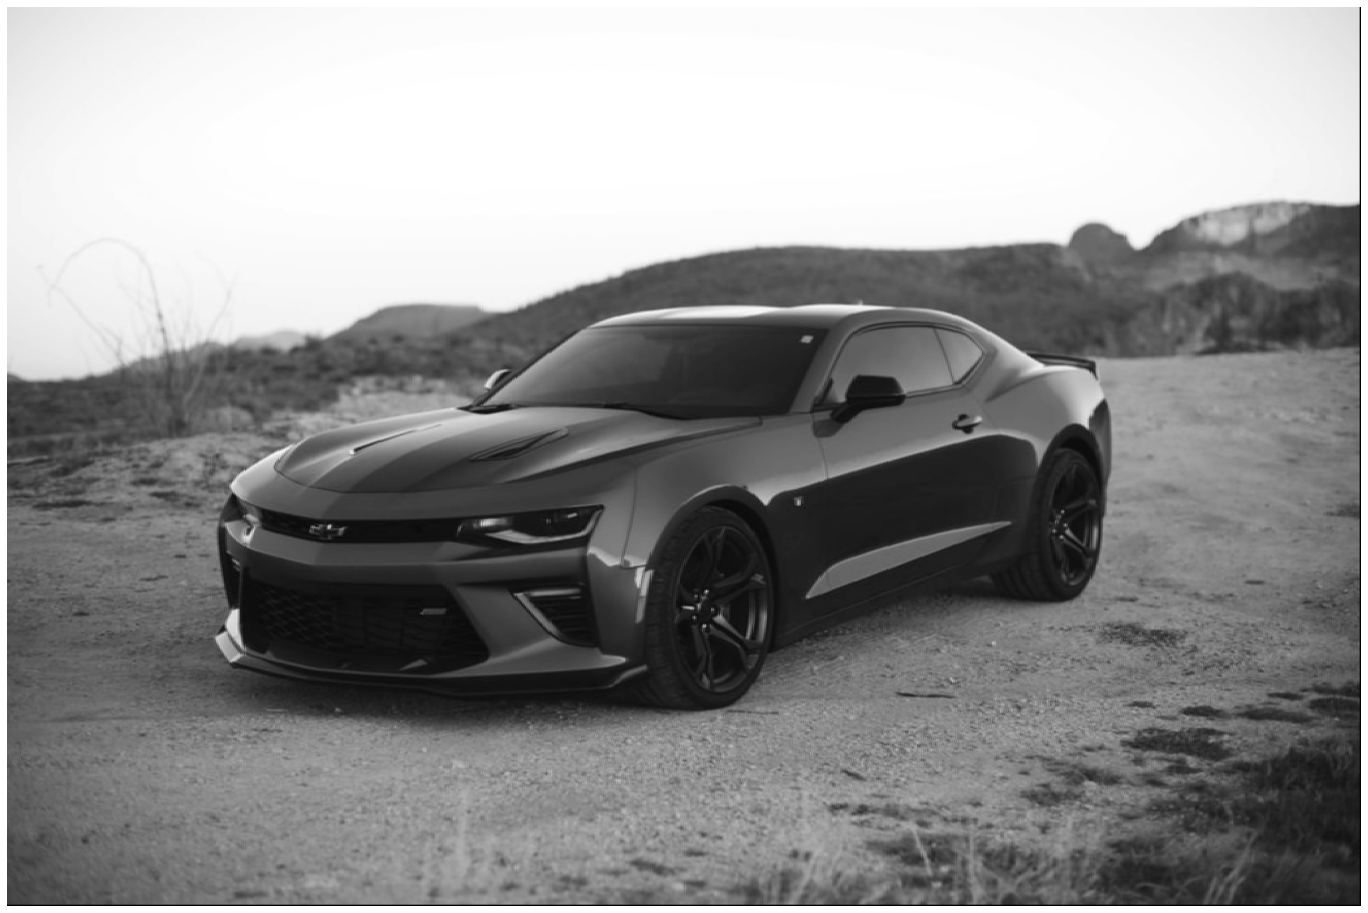

In [52]:
custom_scales = Bilinear_Interpolation(gray_car, 2.03, 2.04)
display_img(custom_scales)

# Scaling Coloured Images

In [53]:
def Scale_Colour_Img(img, fx, fy):
    img = cv2.imread(img)[:,:,::-1]
    R = img[:,:,0]
    G = img[:,:,1]
    B = img[:,:,2]
    
    new_R = Bilinear_Interpolation(R, fx, fy)
    new_G = Bilinear_Interpolation(G, fx, fy)
    new_B = Bilinear_Interpolation(B, fx, fy)
    new_img = np.array(np.dstack((new_R, new_G, new_B)), dtype=np.uint8)
    
    return new_img

Shape: (667, 1000, 3)
dpi: 72.0


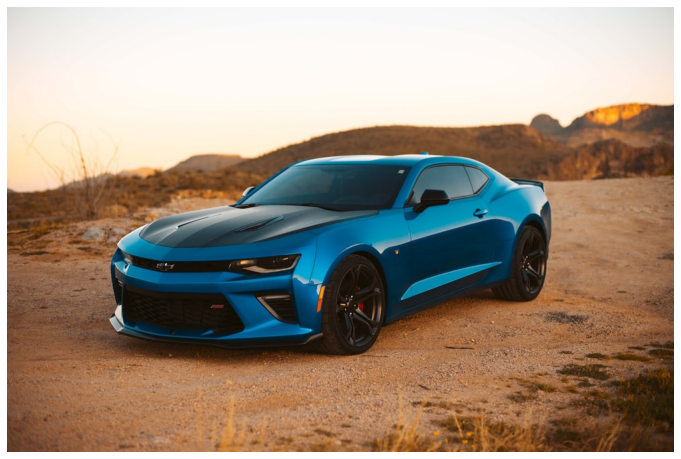

In [54]:
color_dog = cv2.imread('car.jpeg')
display_img(color_dog[:,:,::-1])

Shape: (1220, 2040, 3)
dpi: 72.0


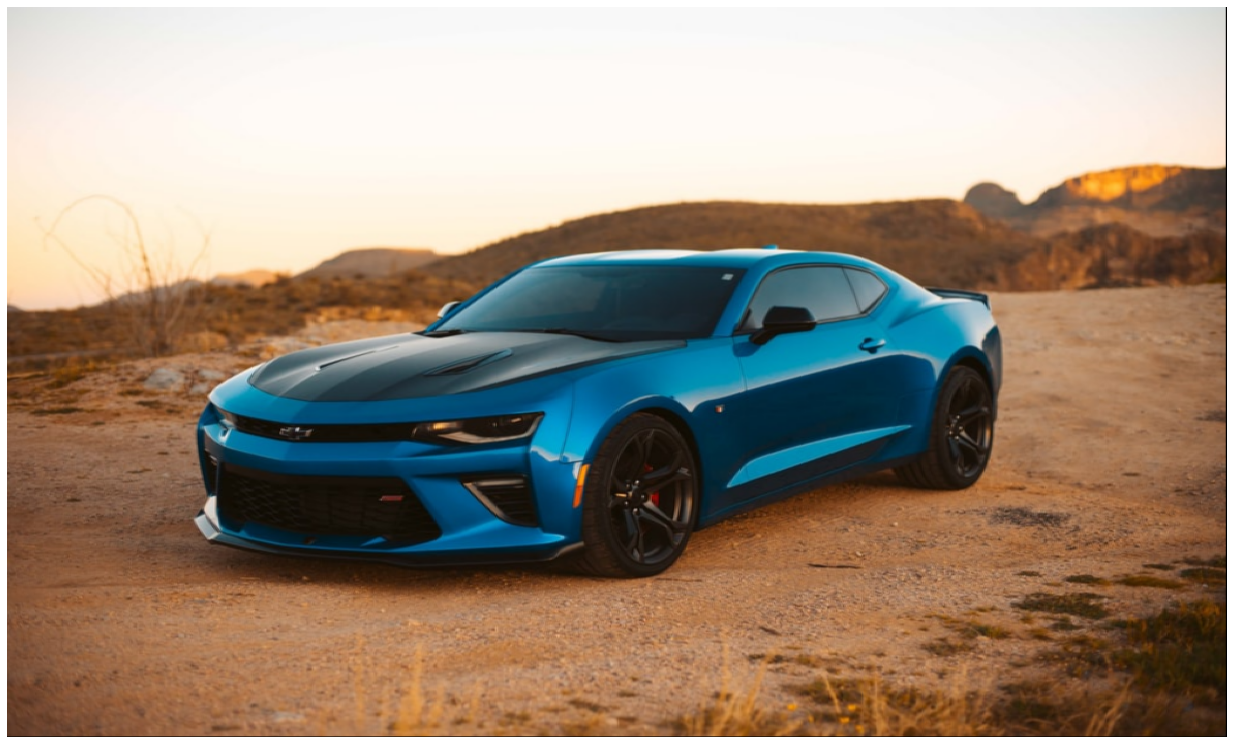

In [55]:
new = Scale_Colour_Img('car.jpeg', 1.83, 2.04)
display_img(new)

In [56]:
# Img_resize = cv2.resize(src=color_car, fx=1.8, fy=2.052, dsize=None)
# display_img(Img_resize[:,:,::-1])

# Rotation of Image

In [57]:
def Rotating_Img(gray_img, angle):
    cos_val = np.cos(np.deg2rad(angle))
    sin_val = np.sin(np.deg2rad(angle))
    R = np.array([
        [cos_val, -sin_val],
        [sin_val, cos_val]
    ])
    
    rMax, cMax = img.shape[0], img.shape[1]
    Coordinates = np.array([ [0, 0], [0, cMax-1], [rMax-1, 0], [rMax-1, cMax-1]])
    New_Coordinates = R.dot(Coordinates.T)
    
    mins = New_Coordinates.min(axis=1)
    maxs = New_Coordinates.max(axis=1)
    
    minR, minC = np.int64(np.floor(mins[0])), np.int64(np.floor(mins[1]))
    maxR, maxC = np.int64(np.ceil(maxs[0])), np.int64(np.ceil(maxs[1]))
    
    R = np.linalg.inv(R)
    New_img = np.zeros(((maxR-minR+1),(maxC-minC+1)), dtype='uint8')
    for i in range(minR, maxR):
        for j in range(minC, maxC):
            new_i, new_j = R.dot([i, j]) 
            if new_i<0 or new_i>=New_img.shape[0] or new_j<0 or new_j>=New_img.shape[1]:
                pass
            else:
                value = np.array(Dist_Bilinear_Interpolation(gray_img, new_i, new_j), dtype=np.uint8)
                New_img[i-minR][j-minC] = value         
    return New_img

In [58]:
def Rotate_Colour_Img(img, angle):
    img = cv2.imread(img)[:,:,::-1]
    R = img[:,:,0]
    G = img[:,:,1]
    B = img[:,:,2]
    
    new_R = Rotating_Img(R, angle)
    new_G = Rotating_Img(G, angle)
    new_B = Rotating_Img(B, angle)
    new_img = np.array(np.dstack((new_R, new_G, new_B)), dtype=np.uint8)
    
    return new_img

In [59]:
new_img = Rotate_Colour_Img('car.jpeg', 45)

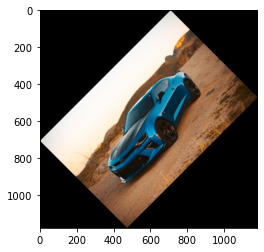

In [60]:
plt.imshow(new_img)

### Using OpenCV 

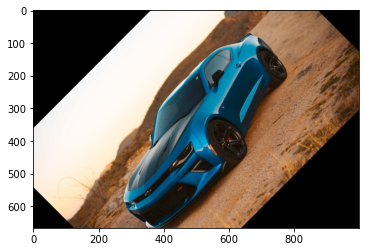

In [61]:
image = cv2.imread('car.jpeg')[:,:,::-1]

(h, w) = image.shape[:2]
(cX, cY) = (w // 2, h // 2)

M = cv2.getRotationMatrix2D((cX, cY), 45, 1.0)
rotated = cv2.warpAffine(image, M, (w, h))
plt.imshow(rotated)

# Generic Functions

In [62]:
def f_Bilinear_Interpolation(img, row, col):
    left_col = int(col)
    right_col = left_col+1
    wr = col-left_col
    wl = right_col-col
        
    top_row = int(row)
    bottom_row = top_row+1
    wt = bottom_row-row
    wb = row-top_row
    if top_row>=0 and bottom_row<img.shape[0] and left_col>=0 and right_col<img.shape[1]:   
        a = wl*img[top_row, right_col]+wr*img[top_row, left_col]
        b = wl*img[bottom_row, right_col]+wr*img[bottom_row, left_col]     
        c = wt*a+wb*b
        return int(c)
    else:
        return 0

In [63]:
def f_getExtentsAffine(T, rMax, cMax):
    Coordinates = np.array([ [0, 0, 1], [0, cMax-1, 1], [rMax-1, 0, 1], [rMax-1, cMax-1, 1]])
    New_Coordinates = T.dot(Coordinates.T)
    
    mins = New_Coordinates.min(axis=1)
    maxs = New_Coordinates.max(axis=1)
    
    minR, minC = np.int64(np.floor(mins[0])), np.int64(np.floor(mins[1]))
    maxR, maxC = np.int64(np.ceil(maxs[0])), np.int64(np.ceil(maxs[1]))
    H, W = (maxR-minR+1), (maxC-minC+1)
    
    return minR, minC, maxR, maxC, H, W

In [64]:
def f_tranfrom(T, gray_img):
    
    rMax = gray_img.shape[0]
    cMax = gray_img.shape[1]
    minR, minC, maxR, maxC, H, W = f_getExtentsAffine(T, rMax, cMax)
    
    T = np.linalg.inv(T)
    New_img = np.zeros(((maxR-minR+1),(maxC-minC+1)), dtype='uint8')
    for i in range(minR, maxR):
        for j in range(minC, maxC):
            new_i, new_j, temp = T.dot([i, j, 1]) 
            if new_i<0 or new_i>=New_img.shape[0] or new_j<0 or new_j>=New_img.shape[1]:
                pass
            else:
                value = np.array(f_Bilinear_Interpolation(gray_img, new_i, new_j), dtype=np.uint8)
                New_img[i-minR][j-minC] = value         
    return New_img

In [65]:
def f_tranfrom_color(img, T):
    img = cv2.imread(img)[:,:,::-1]
    R = img[:,:,0]
    G = img[:,:,1]
    B = img[:,:,2]
    
    new_R = f_tranfrom(T, R)
    new_G = f_tranfrom(T, G)
    new_B = f_tranfrom(T, B)
    new_img = np.array(np.dstack((new_R, new_G, new_B)), dtype=np.uint8)
    
    return new_img

# Rotation

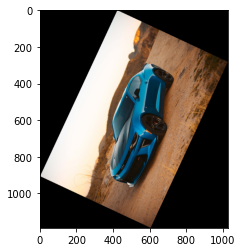

In [66]:
angle = 65
cos_val = np.cos(np.deg2rad(angle))
sin_val = np.sin(np.deg2rad(angle))
R = np.array([
    [cos_val, -sin_val, 0],
    [sin_val, cos_val, 0],
    [0, 0, 1]
])

rotated_img = f_tranfrom_color('car.jpeg', R)
plt.imshow(rotated_img)

# Reflection

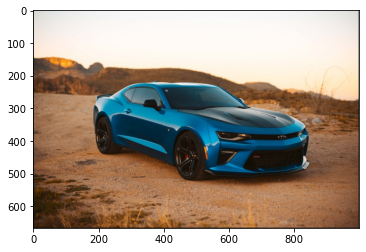

In [67]:
# Reflection around X axis
# R = np.array([
#     [-1, 0, 0],
#     [0, 1, 0],
#     [0, 0, 1]
# ])

# Reflection around Y axis
R = np.array([
    [1, 0, 0],
    [0, -1, 0],
    [0, 0, 1]
])


reflected_img = f_tranfrom_color('car.jpeg', R)
plt.imshow(reflected_img)

### Using OpenCV

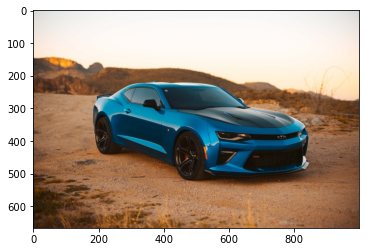

In [68]:
car = cv2.imread('car.jpeg')[:,:,::-1]

img = cv2.flip(car, 1)   # 0 mean X-axis Flip , 1 mean Y-axis Flip
plt.imshow(img)

# Shear

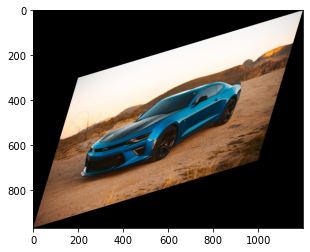

In [69]:
k = -0.3
# when Row Change Col remain same
# R = np.array([
#     [1, k, 0],
#     [0, 1, 0],
#     [0, 0, 1]
# ])

# when Col Change row remain same
# R = np.array([
#     [1, 0, 0],
#     [k, 1, 0],
#     [0, 0, 1]
# ])

# Shear on Both Axis
R = np.array([
    [1, k, 0],
    [k, 1, 0],
    [0, 0, 1]
])

shear_img = f_tranfrom_color('car.jpeg', R)
plt.imshow(shear_img)

# Translation   ( Non-Linear ) But 
 Using A trick Able to do using Linear

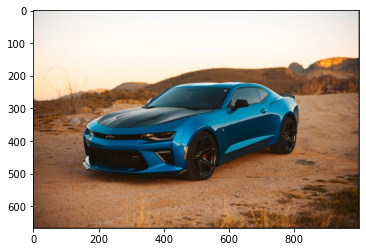

In [70]:
R = np.array([
    [1, 0, -14],
    [0, 1, 40],
    [0, 0, 1]
])

translated_img = f_tranfrom_color('car.jpeg', R)
plt.imshow(translated_img)

# Quiz

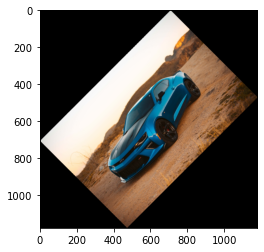

In [71]:
angle = 45
cos_val = np.cos(np.deg2rad(angle))
sin_val = np.sin(np.deg2rad(angle))
R = np.array([
    [cos_val, -sin_val, 200],
    [sin_val, cos_val, -100],
    [0, 0, 1]
])

translated_img = f_tranfrom_color('car.jpeg', R)
plt.imshow(translated_img)

#  Rotating Img for Origin Point using Translation + Rotation
We can Make Any Combination with all the transformation 

In [72]:
angle = 45
cos_val = np.cos(np.deg2rad(angle))
sin_val = np.sin(np.deg2rad(angle))
Rotate = np.array([
    [cos_val, -sin_val, 0],
    [sin_val, cos_val, 0],
    [0, 0, 1]
])

Translate = np.array([
    [1, 0, 500],
    [0, 1, 333],
    [0, 0, 1]
])

R = np.linalg.inv(Translate).dot(Rotate).dot(Translate) 
R

array([[   0.70710678,   -0.70710678, -381.91316754],
       [   0.70710678,    0.70710678,  256.01994873],
       [   0.        ,    0.        ,    1.        ]])

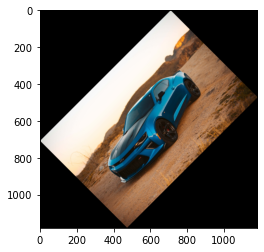

In [73]:
translated_img = f_tranfrom_color('car.jpeg', R)
plt.imshow(translated_img)

# Homo-Graphy (Projective Transformation )

In [74]:
def f_getExtents_Projective(T, rMax, cMax):
    Coordinates = np.array([ [0, 0, 1], [0, cMax-1, 1], [rMax-1, 0, 1], [rMax-1, cMax-1, 1]])
    New_Coordinates = T.dot(Coordinates.T)
    
    # To covert Homogenous Coordiante  to non-Homogenous Coordiante
    New_Coordinates = New_Coordinates/New_Coordinates[2,:] 
    
    mins = New_Coordinates.min(axis=1)
    maxs = New_Coordinates.max(axis=1)
    
    minR, minC = np.int64(np.floor(mins[0])), np.int64(np.floor(mins[1]))
    maxR, maxC = np.int64(np.ceil(maxs[0])), np.int64(np.ceil(maxs[1]))
    H, W = (maxR-minR+1), (maxC-minC+1)
    
    return minR, minC, maxR, maxC, H, W

In [75]:
def f_tranfrom_Projective(T, gray_img):
    
    rMax = gray_img.shape[0]
    cMax = gray_img.shape[1]
    minR, minC, maxR, maxC, H, W = f_getExtents_Projective(T, rMax, cMax)
    
    T = np.linalg.inv(T)
    New_img = np.zeros(((maxR-minR+1),(maxC-minC+1)), dtype='uint8')
    for i in range(minR, maxR):
        for j in range(minC, maxC):
            new_i, new_j, Homogenous_coord = T.dot([i, j, 1]) 
            new_i /= Homogenous_coord
            new_j /= Homogenous_coord
            if new_i<0 or new_i>=New_img.shape[0] or new_j<0 or new_j>=New_img.shape[1]:
                pass
            else:
                value = np.array(f_Bilinear_Interpolation(gray_img, new_i, new_j), dtype=np.uint8)
                New_img[i-minR][j-minC] = value         
    return New_img

In [76]:
def f_tranfrom_color_projective(img, T):
    dog_img = cv2.imread(img)[:,:,::-1]
    R = dog_img[:,:,0]
    G = dog_img[:,:,1]
    B = dog_img[:,:,2]
    
    new_R = f_tranfrom_Projective(T, R)
    new_G = f_tranfrom_Projective(T, G)
    new_B = f_tranfrom_Projective(T, B)
    new_img = np.array(np.dstack((new_R, new_G, new_B)), dtype=np.uint8)
    
    return new_img

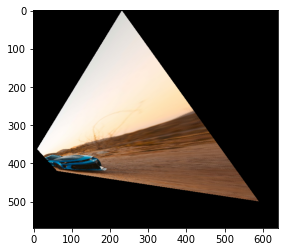

In [77]:
angle = 45
cos_val = np.cos(np.deg2rad(angle))
sin_val = np.sin(np.deg2rad(angle))
Rotate = np.array([
    [cos_val, -sin_val, 0],
    [sin_val, cos_val, 0],
    [0, 0, 1]
])

Translate = np.array([
    [1, 0, 500],
    [0, 1, 333],
    [0, 0, 1]
])

R = np.linalg.inv(Translate).dot(Rotate).dot(Translate) 
R[2, :] = np.array([0.0003, 0.01003, 0.8])

new_img = f_tranfrom_color_projective('car.jpeg', R)
plt.imshow(new_img)